# HOUSING PRICE CASE STUDY

### Objective: 
A company wants to enter a housing market where they want to purchase at a lower price and sell at a higher price.
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Hence a regularised regression model is built in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

### 1. Reading the dataset

In [2]:
HousingData = pd.read_csv("train.csv", na_values="NAN")

In [12]:
HousingData.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [13]:
HousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. The dependent variable is SalePrice. Hence visualising sales price

In [14]:
HousingData["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

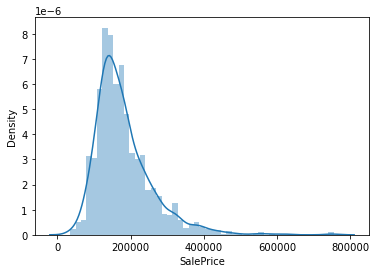

In [15]:
sns.distplot(HousingData['SalePrice'])

In [16]:
HousingData["SalePrice"].mean()

180921.19589041095

In [17]:
HousingData["SalePrice"].median()

163000.0

In [18]:
HousingData["SalePrice"].mode()

0    140000
dtype: int64

NOTE: From the above plot, it is visible that the dependent variable is positively skewed and hence mode<median<mean confirms the fact

### 3. Measuring skewness and kurtosis

In [19]:
HousingData["SalePrice"].skew()

1.8828757597682129

In [20]:
HousingData["SalePrice"].kurt()

6.536281860064529

### 4. Using scatter plot for the visualisation of numeric vaiables

In [21]:
# All numeric variables in the dataset
HousingData_numeric = HousingData.select_dtypes(include=['float64','int64'])
HousingData_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

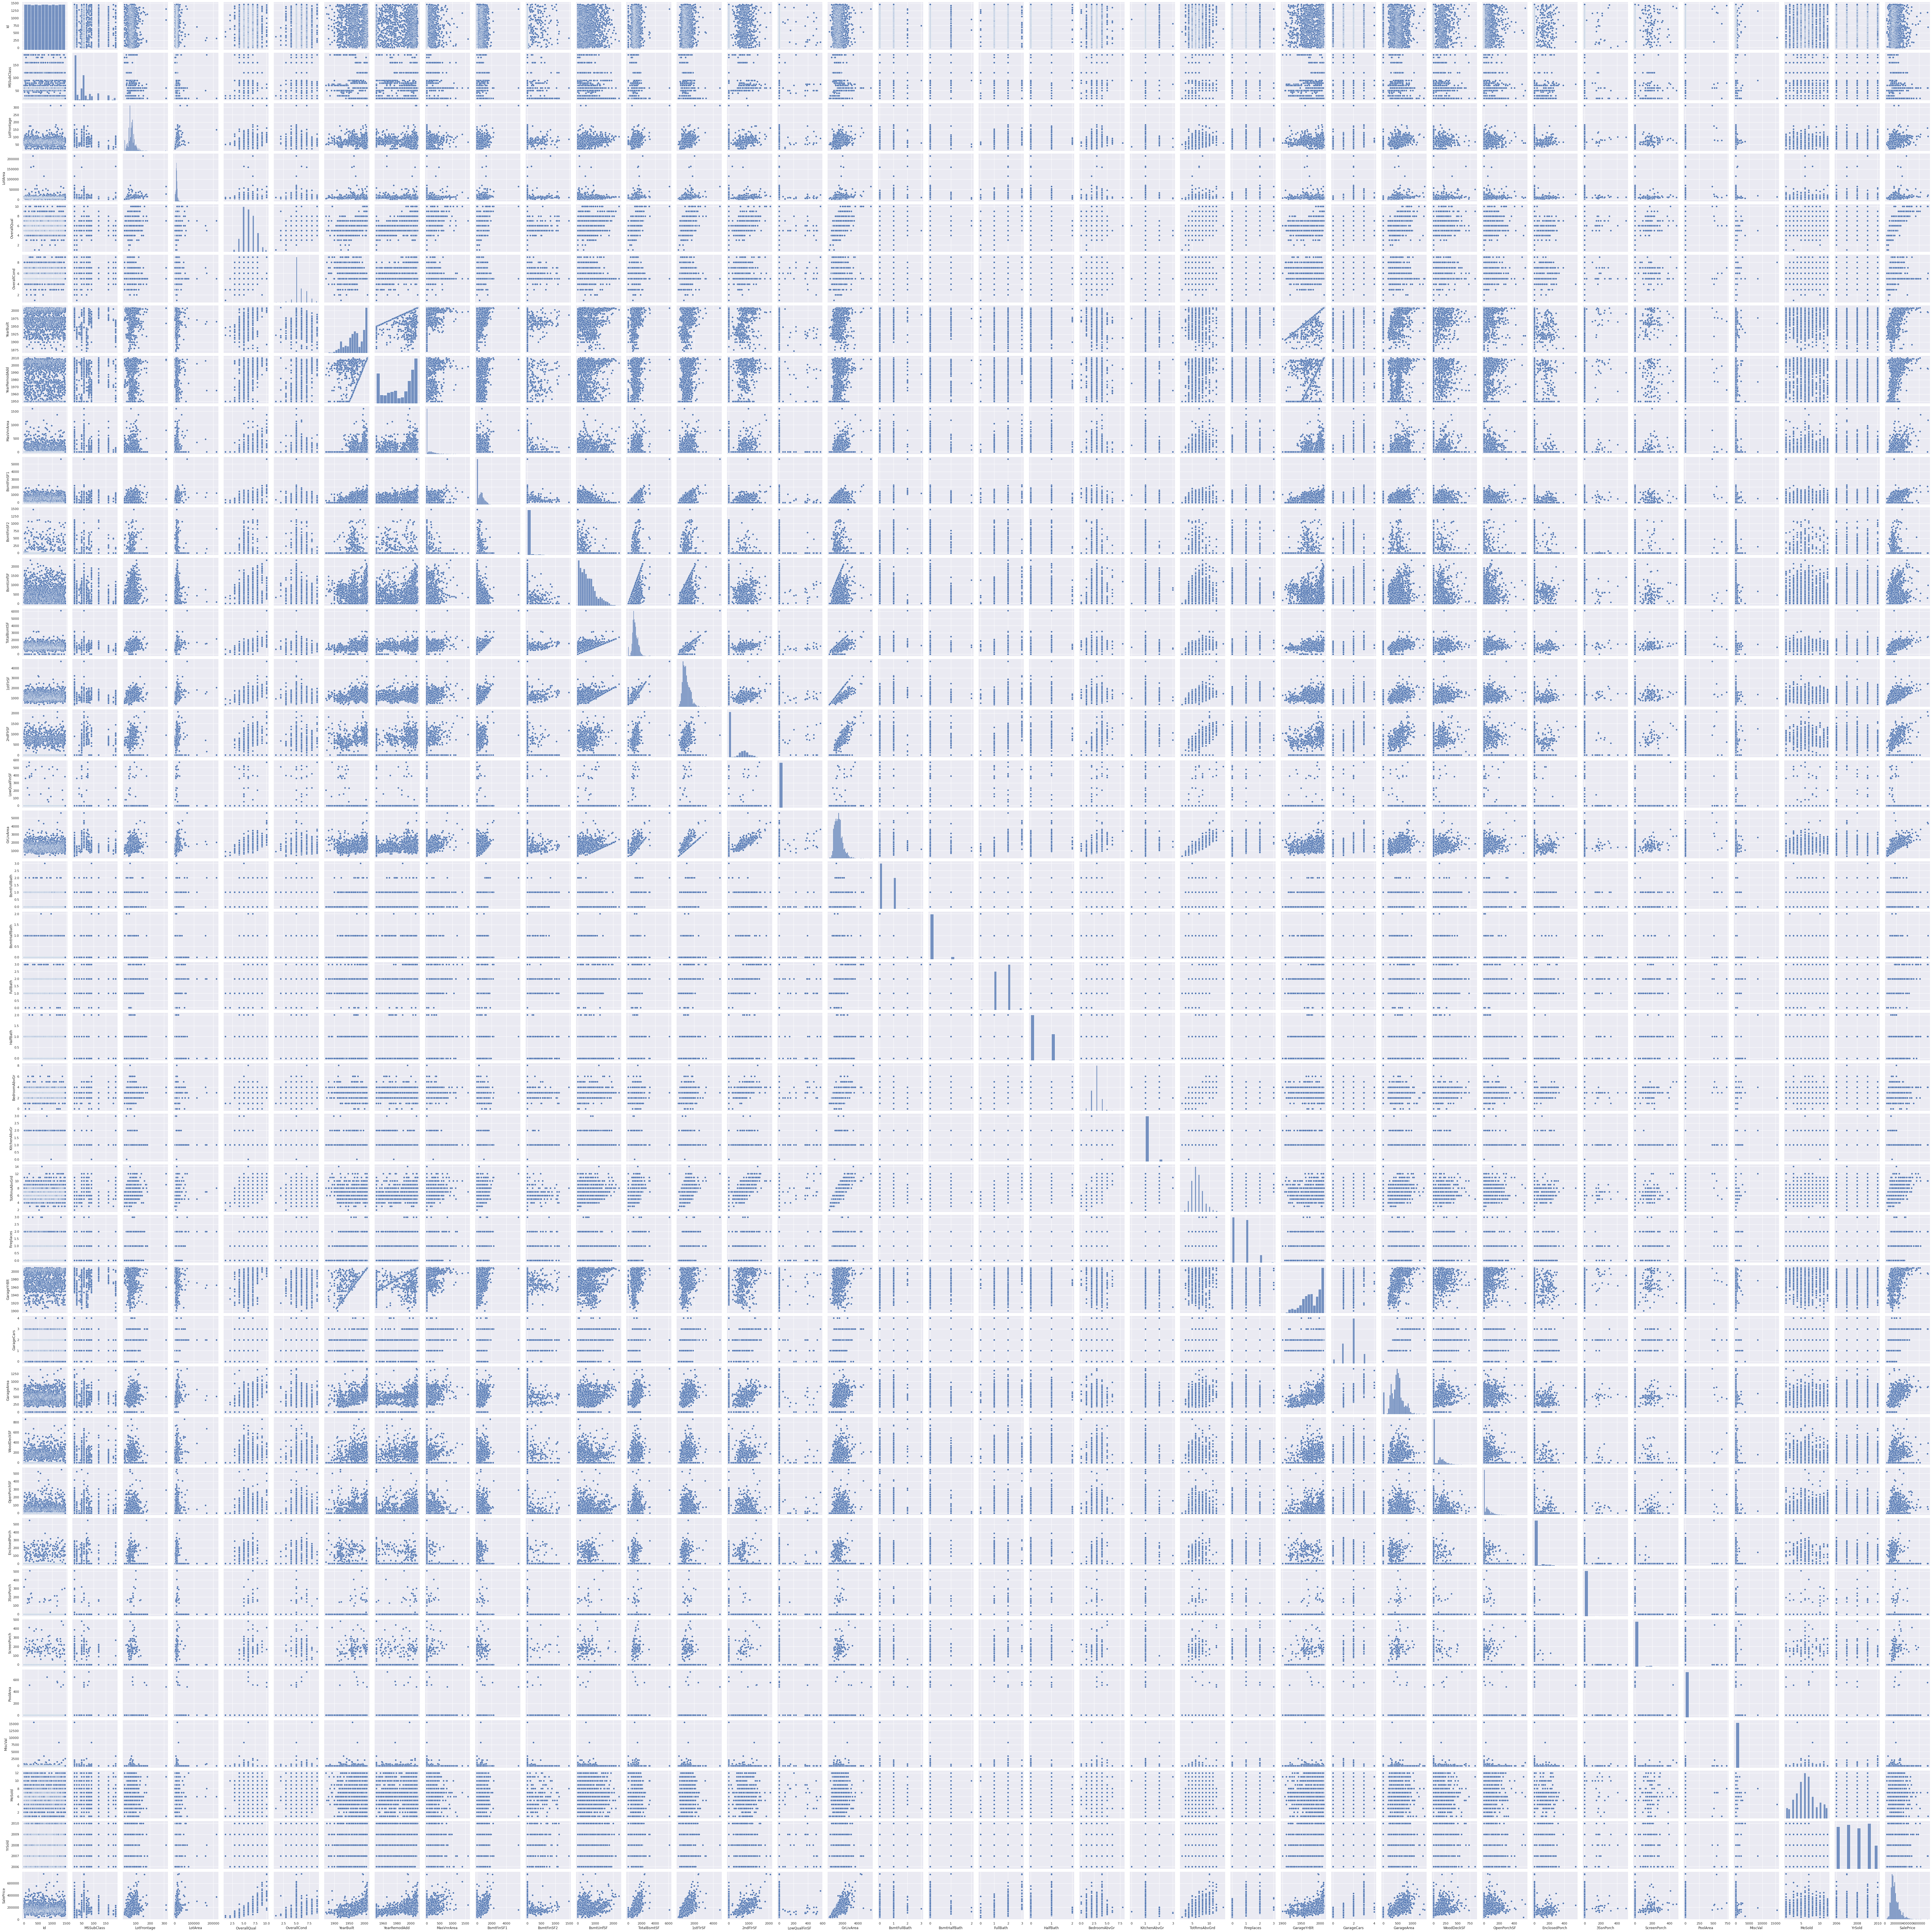

In [23]:
sns.set()
sns.pairplot(HousingData_numeric)

plt.show();

### 4. Using box plot for the visualisation of character variables(some)

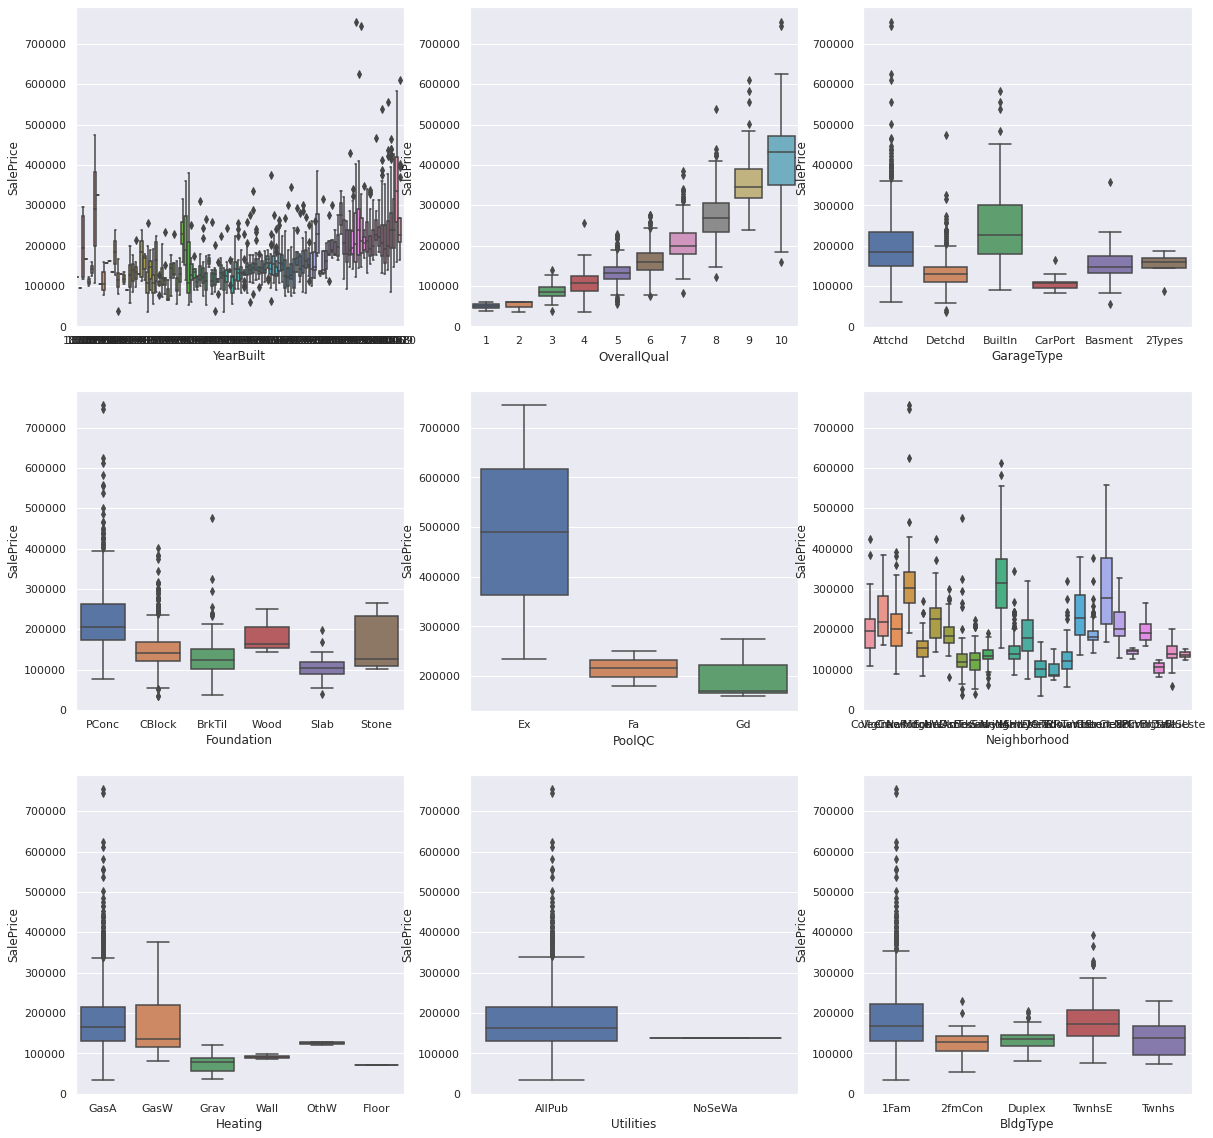

In [24]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,4)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,5)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,6)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,7)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,8)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = HousingData)
plt.subplot(3,3,9)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = HousingData)
plt.show()

### 5. Checking correlation among variables

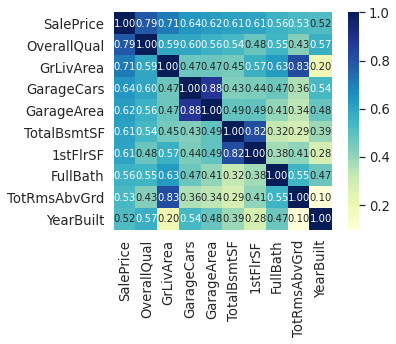

In [25]:
corr_matrix = HousingData.corr()
variable = 10
column = corr_matrix.nlargest(variable,'SalePrice')['SalePrice'].index
data = np.corrcoef(HousingData[column].values.T)
sns.set(font_scale=1.20)
heat_map = sns.heatmap(data, cbar=True, annot=True, square=True,cmap ="YlGnBu", fmt='.2f', annot_kws={'size': 10}, yticklabels=column.values, xticklabels=column.values)
plt.show()

In [26]:
corr_matrix

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

### 6. Identifying and treating Missing data

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    Missing_percent =round((HousingData.isnull().sum()/HousingData.isnull().count())*100,2).sort_values(ascending=False)
    print(Missing_percent)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

Note: It is observed that 6 variables have very high percentages of missing but from the data dictionary, it is understood that for few variables, missing values are valid values. Hence dropping is not ideal. Hence imputing the numeric variables with median values and character variable with highest frequency value.

##### For the below variables, missing values are valid values

In [28]:
meaningful_null=["PoolQC" , "MiscFeature" , "Alley" , "Fence" , "FireplaceQu" , "GarageCond" , "GarageType" , "GarageFinish" , "GarageQual" , "BsmtExposure" , "BsmtFinType2" , "BsmtFinType1" , "BsmtCond" , "BsmtQual"] 

In [29]:
len(meaningful_null)

14

In [30]:
meaningless_null=["LotFrontage" , "GarageYrBlt" , "MasVnrArea", "MasVnrType", "Electrical"]

In [31]:
len(meaningless_null)

5

##### Filling meaningfull null values with "Missing"

In [32]:
for i in meaningful_null:
    HousingData[i].fillna("Missing", inplace=True)

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    Missing_percent =round((HousingData.isnull().sum()/HousingData.isnull().count())*100,2).sort_values(ascending=False)
    print(Missing_percent)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
BsmtQual          0.00
Foundation        0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
YearBuilt         0.00
TotalBsmtSF       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
OverallCond       0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating           0.00
ScreenPorch

##### Now, LotFrontage has more than 10% missing, imputing this variable may bias the model result. Hence dropping the variable

In [34]:
HousingData=HousingData.drop("LotFrontage",axis=1)
len(HousingData.columns)

80

In [35]:
HousingData.head(5)

Id  MSSubClass MSZoning  LotArea Street    Alley LotShape LandContour  \
0   1          60       RL     8450   Pave  Missing      Reg         Lvl   
1   2          20       RL     9600   Pave  Missing      Reg         Lvl   
2   3          60       RL    11250   Pave  Missing      IR1         Lvl   
3   4          70       RL     9550   Pave  Missing      IR1         Lvl   
4   5          60       RL    14260   Pave  Missing      IR1         Lvl   

  Utilities LotConfig  ... PoolArea   PoolQC    Fence MiscFeature MiscVal  \
0    AllPub    Inside  ...        0  Missing  Missing     Missing       0   
1    AllPub       FR2  ...        0  Missing  Missing     Missing       0   
2    AllPub    Inside  ...        0  Missing  Missing     Missing       0   
3    AllPub    Corner  ...        0  Missing  Missing     Missing       0   
4    AllPub       FR2  ...        0  Missing  Missing     Missing       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [36]:
HousingData["GarageYrBlt"].dtypes

dtype('float64')

In [37]:
HousingData["MasVnrArea"].dtypes

dtype('float64')

In [38]:
HousingData["MasVnrType"].dtypes

dtype('O')

In [39]:
HousingData["Electrical"].dtypes

dtype('O')

In [40]:
HousingData["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [41]:
HousingData["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [42]:
HousingData["GarageYrBlt"].fillna(HousingData["GarageYrBlt"].median(), inplace=True)
HousingData["MasVnrArea"].fillna(HousingData["MasVnrArea"].median(), inplace=True)
HousingData["MasVnrType"].fillna("None", inplace=True)
HousingData["Electrical"].fillna("SBrkr", inplace=True)

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    Missing_percent =round((HousingData.isnull().sum()/HousingData.isnull().count())*100,2).sort_values(ascending=False)
    print(Missing_percent)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
RoofStyle        0.0
YearRemodAdd     0.0
YearBuilt        0.0
Utilities        0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
OverallCond      0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
ScreenPorch      0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [44]:
HousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 7. Data preperation for Model

from initial analysis, it is understood that some transformation is needed and skewness goes away with log tranformation. Hence applying log transformation in dependent variable

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice_new', ylabel='Density'>

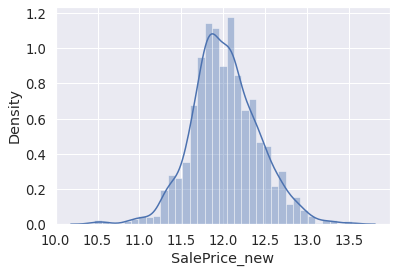

In [45]:
HousingData["SalePrice_new"] = np.log(HousingData["SalePrice"])
sns.distplot(HousingData['SalePrice_new'])

In [46]:
HousingData["SalePrice_new"].mean()

12.024050901109373

In [47]:
HousingData["SalePrice_new"].median()

12.0015054797889

In [48]:
HousingData["SalePrice_new"].mode()

0    11.849398
dtype: float64

Explanation: The skewness is gone and now it is normally distributed as mean=median=mode

##### Encoding character variables for using in model

In [49]:
# All character variables in the dataset
HousingData_object = HousingData.select_dtypes(include=['object'])
HousingData_object.head()

MSZoning Street    Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  Missing      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  Missing      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  Missing      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  Missing      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  Missing      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive   PoolQC    Fence MiscFeature SaleType SaleCondition  
0          Y  Missing  Missing     Missing       WD        Normal  
1          Y  Missing  Missing     Missing       WD        Normal  
2          Y  Missing  Missing     Missing       WD        Normal  
3          Y  Missing  Missing     Missing       WD       Abnorml  
4          Y  Missing  Missing     Missing       WD        Normal  

[5 rows x 43 columns]

In [50]:
object_var=HousingData_object.columns.tolist()
object_var

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [51]:
enc = OrdinalEncoder()
HousingData[object_var] = enc.fit_transform(HousingData[object_var])

In [52]:
HousingData.head()

Id  MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  LandContour  \
0   1          60       3.0     8450     1.0    1.0       3.0          3.0   
1   2          20       3.0     9600     1.0    1.0       3.0          3.0   
2   3          60       3.0    11250     1.0    1.0       0.0          3.0   
3   4          70       3.0     9550     1.0    1.0       0.0          3.0   
4   5          60       3.0    14260     1.0    1.0       0.0          3.0   

   Utilities  LotConfig  ...  PoolQC  Fence  MiscFeature  MiscVal  MoSold  \
0        0.0        4.0  ...     3.0    2.0          1.0        0       2   
1        0.0        2.0  ...     3.0    2.0          1.0        0       5   
2        0.0        4.0  ...     3.0    2.0          1.0        0       9   
3        0.0        0.0  ...     3.0    2.0          1.0        0       2   
4        0.0        2.0  ...     3.0    2.0          1.0        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  SalePrice_new  
0    2008       8.0            4.0     208500      12.247694  
1    2007       8.0            4.0     181500      12.109011  
2    2008       8.0            4.0     223500      12.317167  
3    2006       8.0            0.0     140000      11.849398  
4    2008       8.0            4.0     250000      12.429216  

[5 rows x 81 columns]

It is also observed that the ID variable and the old SalePrice variable is of no use in model building. Hence cleaning the data

In [53]:
HousingData=HousingData.drop(["SalePrice","Id"], axis=1)
len(HousingData.columns)

79

### 8. MODEL BUILDING

In [54]:
y = HousingData['SalePrice_new'].values

In [55]:
X =HousingData.drop('SalePrice_new',axis=1).values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

##### Ridge

In [57]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [58]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 100}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


In [59]:
print(model_cv.best_params_)

{'alpha': 100}


In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.002838      0.002706         0.000512        0.000071      0.0001   
1        0.001410      0.000024         0.000476        0.000006       0.001   
2        0.001401      0.000034         0.000477        0.000005        0.01   
3        0.001402      0.000037         0.000474        0.000005        0.05   
4        0.001387      0.000028         0.000480        0.000011         0.1   
5        0.001435      0.000071         0.000487        0.000023         0.2   
6        0.001403      0.000036         0.000484        0.000011         0.3   
7        0.001410      0.000044         0.000477        0.000008         0.4   
8        0.001410      0.000031         0.000477        0.000008         0.5   
9        0.001416      0.000017         0.000485        0.000019         0.6   
10       0.001400      0.000027         0.000490        0.000022         0.7   
11       0.001392      0.000034         0.000475        0.000006         0.8   
12       0.001407      0.000041         0.000476        0.000008         0.9   
13       0.001446      0.000094         0.000476        0.000005           1   
14       0.001395      0.000030         0.000479        0.000006           2   
15       0.001395      0.000029         0.000485        0.000006           3   
16       0.001720      0.000669         0.000481        0.000005           4   
17       0.001380      0.000038         0.000475        0.000007           5   
18       0.001384      0.000035         0.000480        0.000003           6   
19       0.001393      0.000034         0.000482        0.000009           7   
20       0.001379      0.000036         0.000482        0.000006           8   
21       0.001586      0.000137         0.000558        0.000046           9   
22       0.001706      0.000083         0.000615        0.000018          10   
23       0.001717      0.000090         0.000607        0.000038          20   
24       0.001646      0.000025         0.000604        0.000031          50   
25       0.001679      0.000088         0.000589        0.000013         100   
26       0.001604      0.000023         0.000603        0.000042         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.102829          -0.105059   
1    {'alpha': 0.001}          -0.102826          -0.105059   
2     {'alpha': 0.01}          -0.102792          -0.105061   
3     {'alpha': 0.05}          -0.102646          -0.105073   
4      {'alpha': 0.1}          -0.102495          -0.105086   
5      {'alpha': 0.2}          -0.102266          -0.105110   
6      {'alpha': 0.3}          -0.102083          -0.105132   
7      {'alpha': 0.4}          -0.101921          -0.105151   
8      {'alpha': 0.5}          -0.101802          -0.105167   
9      {'alpha': 0.6}          -0.101705          -0.105182   
10     {'alpha': 0.7}          -0.101619          -0.105195   
11     {'alpha': 0.8}          -0.101543          -0.105206   
12     {'alpha': 0.9}          -0.101473          -0.105215   
13     {'alpha': 1.0}          -0.101407          -0.105223   
14     {'alpha': 2.0}          -0.100985          -0.105245   
15     {'alpha': 3.0}          -0.100837          -0.105204   
16     {'alpha': 4.0}          -0.100729          -0.105134   
17     {'alpha': 5.0}          -0.100637          -0.105047   
18     {'alpha': 6.0}          -0.100554          -0.104951   
19     {'alpha': 7.0}          -0.100474          -0.104851   
20     {'alpha': 8.0}          -0.100400          -0.104750   
21     {'alpha': 9.0}          -0.100325          -0.104647   
22    {'alpha': 10.0}          -0.100250          -0.104546   
23      {'alpha': 20}          -0.099609          -0.103626   
24      {'alpha': 50}          -0.098246          -0.102323   
25     {'alpha': 100}          -0.097099          -0.101893   
26     {'alpha': 500}          -0.095709          -0.105060   

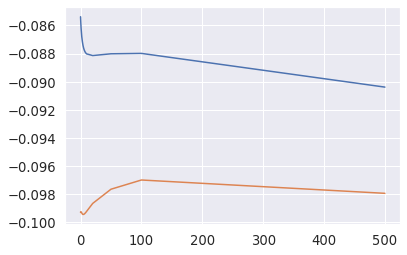

In [61]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.show()

In [62]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.78211929e-04 -9.47247365e-03  1.43314291e-06  6.51431190e-03
  1.49585224e-02 -5.98606287e-03  1.53601036e-02 -8.52719933e-04
  1.17955183e-03  2.03193746e-02  1.67723948e-03 -2.11352523e-04
 -1.98862808e-02 -3.45262956e-03 -5.75783379e-03  6.59246084e-02
  3.37243785e-02  1.85322022e-03  1.34965497e-03  4.47133919e-03
  1.33857347e-02  5.54249086e-04  6.06109270e-05 -2.42523187e-03
  5.68650373e-06  3.71932527e-03  4.95871849e-03  9.51638732e-03
 -1.57945109e-02  7.55001565e-03 -7.45056053e-03 -1.05109145e-02
  2.21219589e-06  6.19298405e-03  5.03888490e-05  6.85553270e-07
  5.32865997e-05 -2.08064995e-03 -9.11689675e-03  1.99253688e-02
  6.68058740e-03  3.31867041e-05  4.02738643e-05  9.32642304e-05
  1.66724798e-04  3.72175747e-02  3.62402274e-03  1.74174462e-02
  8.43753168e-03  1.04007173e-02 -1.10063320e-02 -1.92724722e-02
  9.92469502e-03  1.41949533e-02  3.38683009e-02 -6.93842221e-03
 -8.88121400e-03 -4.47967667e-04 -8.95724834e-03  2.64164278e-02
  1.07197716e-04  4.70715

In [63]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.883811776104556
0.8639851084101173
18.647308581763834
9.80239887694385
0.01826376942386272
0.02237990611174395


##### Lasso

In [64]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.008836      0.002359         0.000633        0.000069      0.0001   
1       0.006510      0.001656         0.000601        0.000011       0.001   
2       0.003363      0.000087         0.000585        0.000007        0.01   
3       0.016540      0.004227         0.000507        0.000017        0.05   
4       0.012486      0.001830         0.000498        0.000010         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.102386          -0.105013          -0.105768   
1   {'alpha': 0.001}          -0.099439          -0.104301          -0.107195   
2    {'alpha': 0.01}          -0.097435          -0.104585          -0.106277   
3    {'alpha': 0.05}          -0.104010          -0.119508          -0.117240   
4     {'alpha': 0.1}          -0.111717          -0.126446          -0.125006   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.088999  ...        -0.099027        0.006779                3   
1          -0.087864  ...        -0.098071        0.007356                2   
2          -0.087347  ...        -0.097894        0.006972                1   
3          -0.103209  ...        -0.109438        0.007337                4   
4          -0.112528  ...        -0.117639        0.006625                8   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.082867           -0.082161           -0.083255   
1           -0.084993           -0.082340           -0.083830   
2           -0.095049           -0.084533           -0.090430   
3           -0.107560           -0.100365           -0.103531   
4           -0.116952           -0.105751           -0.111201   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.089993           -0.088906         -0.085436         0.003313  
1           -0.090191           -0.089534         -0.086178         0.003131  
2           -0.096416           -0.094276         -0.092141         0.004292  
3           -0.108513           -0.107548         -0.105503         0.003091  
4           -0.117066           -0.117371         -0.113668         0.004578  

[5 rows x 21 columns]

In [66]:
print(model_cv.best_params_)

{'alpha': 0.01}


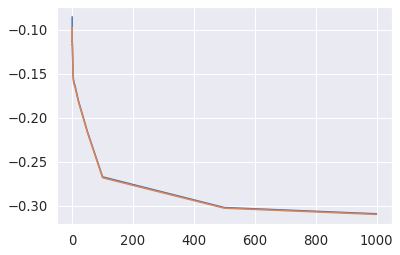

In [67]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.show()

In [68]:
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-6.49336644e-04, -0.00000000e+00,  1.99109826e-06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.24058450e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  7.46678766e-02,
        2.59432557e-02,  2.70476768e-03,  1.90233987e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        4.76364430e-07, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.21668516e-03,  0.00000000e+00, -2.75984708e-03, -1.03787712e-02,
        6.15211956e-05,  0.00000000e+00,  6.05594696e-05,  3.20160351e-05,
        2.35489412e-05, -0.00000000e+00, -7.82005266e-03,  0.00000000e+00,
        0.00000000e+00,  2.21592025e-04,  2.27202518e-04,  2.44327733e-04,
        3.06934384e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.72562152e-05,
        0.00000000e+00,  

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8638821535520821
0.8528956264689723
21.84585839339094
10.601601994007943
0.02139653123740543
0.024204570762575213


In [70]:
# Creating a table which contain all the metrics

table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2}

rg_metric = pd.DataFrame(table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.883812          0.863882
1   R2 Score (Test)          0.863985          0.852896
2       RSS (Train)         18.647309         21.845858
3        RSS (Test)          9.802399         10.601602
4       MSE (Train)          0.135144          0.146276
5        MSE (Test)          0.149599          0.155578